In [1]:
import requests
import os
import time
import os
import pandas as pd
import zipfile

# Define directories
data_dir = 'data/aemo_data'
out_dir = 'data/concatenated_data'
analysis_dir = 'data/analysis'
os.makedirs(out_dir, exist_ok=True)
# Create directory to store files
os.makedirs(data_dir, exist_ok=True)
os.makedirs(analysis_dir, exist_ok=True)


# List of states/regions
regions = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']

In [2]:
# Headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Data loading and preprocessing

In [3]:
## Dataset 1: NEM Registration and Exemption List.xlsx
## The NEM Registration and Exemption List is a list of all registered participants in the NEM and their registration details.

## Download the file
registration_url = "https://www.aemo.com.au/-/media/files/electricity/nem/participant_information/nem-registration-and-exemption-list.xlsx"
registration_filename = "data/aemo_data/NEM_Registration_and_Exemption_List.xlsx"

try:
    response = requests.get(registration_url, headers=headers)
    response.raise_for_status()
    with open(registration_filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {registration_filename}")
except requests.exceptions.RequestException as e:
    print(f"Failed to download {registration_url}: {e}")

Downloaded data/aemo_data/NEM_Registration_and_Exemption_List.xlsx


In [4]:
def prepare_registration_data():
    input_filename = "data/aemo_data/NEM_Registration_and_Exemption_List.xlsx"
    output_filename = "data/analysis/NEM_Registration.csv"

    try:
        df = pd.read_excel(input_filename, sheet_name='PU and Scheduled Loads')
        df.to_csv(output_filename, index=False)
        print(f"Prepared data saved to {output_filename}")
    except Exception as e:
        print(f"Failed to prepare data: {e}")

prepare_registration_data()

Prepared data saved to data/analysis/NEM_Registration.csv


In [5]:
from google.colab import files
files.download('/content/data/analysis/NEM_Registration.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
## Analysis NEM Registration data
# load the data from data/analysis/NEM_Registration.csv
nem_registration = pd.read_csv("data/analysis/NEM_Registration.csv")
nem_registration

,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Units,Aggregation,DUID,Reg Cap generation (MW),Max Cap generation (MW),Max ROC/Min generation,Reg Cap consumption (MW),Max Cap consumption (MW),Max ROC/Min consumption,Comments
0,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,1-3,Y,ADPBA1G,7.76,6.15,2,NaN,NaN,NaN,NaN
1,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Load,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,1-3,Y,ADPBA1L,7.76,6.15,2,NaN,NaN,NaN,NaN
2,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Hydro,Water,Renewable,Run of River,1-2,Y,ADPMH1,1.44,1,-,NaN,NaN,NaN,NaN
3,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,"1-4, 5-9",Y,ADPPV1,24.75,19,4,NaN,NaN,NaN,NaN
4,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Solar,Solar,Renewable,Photovoltaic Flat panel,1-2,Y,ADPPV2,0.2,0.2,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,AGL Hydro Partnership,Yarrawonga Hydro Power Station,VIC1,Generating Unit,Market,Non-Scheduled,Hydro,Water,Renewable,Hydro - Gravity,1-2,N,YWNGAHYD,9,9,0,NaN,NaN,NaN,NaN
537,RTA Yarwun Pty Ltd,Yarwun Power Station,QLD1,Generating Unit,Market,Non-Scheduled**,Fossil,Natural Gas,Combustion,Combined Cycle Gas Turbine (CCGT),1,Y,YARWUN_1,154,180,36,NaN,NaN,NaN,NaN
538,Yatpool Sun Farm Pty Ltd,Yatpool Solar Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,1-36,Y,YATSF1,94,81,16,NaN,NaN,NaN,NaN
539,Alinta Energy Retail Sales Pty Ltd,Yawong Wind Farm,VIC1,Generating Unit,Market,Non-Scheduled,Wind,Wind,Renewable,Wind - Onshore,1-2,Y,YAWWF1,7.2,7.2,0,NaN,NaN,NaN,NaN


-- Remove
* Fuel Source - Descriptor
* Reg Cap consumption,
* Max Cap consumption,
* Max ROC/Min consumption,
* Comments

In [7]:
nem_registration.isnull().sum()

,0
Participant,0
Station Name,0
Region,0
Dispatch Type,0
Category,0
Classification,0
Fuel Source - Primary,3
Fuel Source - Descriptor,3
Technology Type - Primary,3
Technology Type - Descriptor,3


In [8]:
nem_registration["Region"].value_counts()

,count
Region,
NSW1,142
VIC1,133
QLD1,132
SA1,99
TAS1,35


In [9]:
nem_registration["Station Name"].value_counts()

,count
Station Name,
Adelaide Desalination Plant,7
Christies Beach Wastewater Treatment Plant,6
Valley Power Peaking Facility,6
Gladstone Power Station,6
Eraring Power Station,5
...,...
Gunnedah Solar Farm,1
Gullen Range Solar Farm,1
Grosvenor 2,1


In [10]:
nem_registration["Category"].value_counts()
# Make the values into market or non market remove the other attributes

,count
Category,
Market,523
Non-Market,15
market,2
Market,1


In [11]:
nem_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Participant                   541 non-null    object 
 1   Station Name                  541 non-null    object 
 2   Region                        541 non-null    object 
 3   Dispatch Type                 541 non-null    object 
 4   Category                      541 non-null    object 
 5   Classification                541 non-null    object 
 6   Fuel Source - Primary         538 non-null    object 
 7   Fuel Source - Descriptor      538 non-null    object 
 8   Technology Type - Primary     538 non-null    object 
 9   Technology Type - Descriptor  538 non-null    object 
 10  Units                         539 non-null    object 
 11  Aggregation                   540 non-null    object 
 12  DUID                          541 non-null    object 
 13  Reg C

In [12]:
nem_registration = nem_registration.drop(columns=['Fuel Source - Descriptor','Reg Cap consumption (MW)', 'Max Cap consumption (MW)', 'Max ROC/Min consumption', 'Comments'])
nem_registration

,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Technology Type - Primary,Technology Type - Descriptor,Units,Aggregation,DUID,Reg Cap generation (MW),Max Cap generation (MW),Max ROC/Min generation
0,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Scheduled,Battery storage,Storage,Battery and Inverter,1-3,Y,ADPBA1G,7.76,6.15,2
1,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Load,Market,Scheduled,Battery storage,Storage,Battery and Inverter,1-3,Y,ADPBA1L,7.76,6.15,2
2,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Hydro,Renewable,Run of River,1-2,Y,ADPMH1,1.44,1,-
3,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Semi-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,"1-4, 5-9",Y,ADPPV1,24.75,19,4
4,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Solar,Renewable,Photovoltaic Flat panel,1-2,Y,ADPPV2,0.2,0.2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,AGL Hydro Partnership,Yarrawonga Hydro Power Station,VIC1,Generating Unit,Market,Non-Scheduled,Hydro,Renewable,Hydro - Gravity,1-2,N,YWNGAHYD,9,9,0
537,RTA Yarwun Pty Ltd,Yarwun Power Station,QLD1,Generating Unit,Market,Non-Scheduled**,Fossil,Combustion,Combined Cycle Gas Turbine (CCGT),1,Y,YARWUN_1,154,180,36
538,Yatpool Sun Farm Pty Ltd,Yatpool Solar Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,1-36,Y,YATSF1,94,81,16
539,Alinta Energy Retail Sales Pty Ltd,Yawong Wind Farm,VIC1,Generating Unit,Market,Non-Scheduled,Wind,Renewable,Wind - Onshore,1-2,Y,YAWWF1,7.2,7.2,0


In [14]:

base_mms_url = "http://www.nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/{}/MMSDM_{}_{}/MMSDM_Historical_Data_SQLLoader/DATA/{}.zip"

def download_dispatch_unit_scada_data(base_mms_url):
    for year in range(2023, 2025 + 1):  # Includes 2023 and 2024
        for month in range(1, 13):
            if year == 2025 and month > 12:
                continue  # Stop at Dec 2024

            month_str = f"{year}{month:02d}"

            # Choose filename pattern depending on year/month
            if (year == 2024 and month >= 8) or year >= 2025:
                filename = f"PUBLIC_ARCHIVE%23DISPATCH_UNIT_SCADA%23FILE01%23{month_str}010000"
            else:
                filename = f"PUBLIC_DVD_DISPATCH_UNIT_SCADA_{month_str}010000"

            url = base_mms_url.format(year, year, f"{month:02d}", filename)

            zipname = f"data/aemo_data/DISPATCH_UNIT_SCADA_{month_str}.zip"
            csvname = f"data/aemo_data/DISPATCH_UNIT_SCADA_{month_str}.csv"

            try:
                if not os.path.exists(zipname):
                    response = requests.get(url, headers=headers)
                    response.raise_for_status()
                    with open(zipname, 'wb') as f:
                        f.write(response.content)
                    print(f"Downloaded {zipname}")
                else:
                    print(f"Skipping {zipname} - already exists")

                if not os.path.exists(csvname):
                    with zipfile.ZipFile(zipname, 'r') as zip_ref:
                        zip_ref.extractall("data/aemo_data")
                    print(f"Unzipped {zipname}")

                    # Correct filename
                    filename = filename.replace('%23', '#')
                    os.rename(f"data/aemo_data/{filename}.CSV", csvname)
                    print(f"Renamed to {csvname}")
                else:
                    print(f"Skipping {csvname} - already exists")
            except requests.exceptions.RequestException as e:
                print(f"Failed to download {url}: {e}")

download_dispatch_unit_scada_data(base_mms_url)


Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202301.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202301.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCADA_202301.csv
Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202302.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202302.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCADA_202302.csv
Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202303.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202303.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCADA_202303.csv
Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202304.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202304.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCADA_202304.csv
Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202305.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202305.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCADA_202305.csv
Downloaded data/aemo_data/DISPATCH_UNIT_SCADA_202306.zip
Unzipped data/aemo_data/DISPATCH_UNIT_SCADA_202306.zip
Renamed to data/aemo_data/DISPATCH_UNIT_SCA

In [15]:
import pandas as pd

# Step 1: Create an empty list to collect DataFrames
scada_dfs = []

# Step 2: Loop through years and months
for year in range(2023, 2025 + 1):  # 2023 to 2024 inclusive
    for month in range(1, 13):
        month_str = f"{month:02d}"
        file_path = f"data/aemo_data/DISPATCH_UNIT_SCADA_{year}{month_str}.csv"

        # Step 3: Read each file, skip header/footer
        try:
            temp_df = pd.read_csv(file_path, skiprows=1, skipfooter=1, engine='python')
            scada_dfs.append(temp_df)
            print(f"Loaded: {file_path}")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Step 4: Combine all loaded DataFrames
scada_df = pd.concat(scada_dfs, ignore_index=True)

# Step 5: Convert SETTLEMENTDATE to datetime
scada_df['SETTLEMENTDATE'] = pd.to_datetime(scada_df['SETTLEMENTDATE'])

# Sort chronologically
scada_df = scada_df.sort_values('SETTLEMENTDATE')

# Preview
scada_df.head()


Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202301.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202302.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202303.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202304.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202305.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202306.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202307.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202308.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202309.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202310.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202311.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202312.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202401.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202402.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202403.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202404.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202405.csv
Loaded: data/aemo_data/DISPATCH_UNIT_SCADA_202406.csv
Loaded: data/aemo_data/DISPA

,I,DISPATCH,UNIT_SCADA,1,SETTLEMENTDATE,DUID,SCADAVALUE,LASTCHANGED
0,D,DISPATCH,UNIT_SCADA,1,2023-01-01 00:05:00,BARCSF1,0.10000,NaN
275814,D,DISPATCH,UNIT_SCADA,1,2023-01-01 00:05:00,QPS1,0.00000,NaN
275813,D,DISPATCH,UNIT_SCADA,1,2023-01-01 00:05:00,QBYNBL1,0.00000,NaN
275812,D,DISPATCH,UNIT_SCADA,1,2023-01-01 00:05:00,QPS3,0.00000,NaN
275811,D,DISPATCH,UNIT_SCADA,1,2023-01-01 00:05:00,QBYNBG1,0.56549,NaN


In [16]:
scada_df['DISPATCH'].value_counts()

,count
DISPATCH,
DISPATCH,112441237


In [17]:
scada_df = scada_df.drop(columns=['1','LASTCHANGED','UNIT_SCADA'])
scada_df

,I,DISPATCH,SETTLEMENTDATE,DUID,SCADAVALUE
0,D,DISPATCH,2023-01-01 00:05:00,BARCSF1,0.100000
275814,D,DISPATCH,2023-01-01 00:05:00,QPS1,0.000000
275813,D,DISPATCH,2023-01-01 00:05:00,QBYNBL1,0.000000
275812,D,DISPATCH,2023-01-01 00:05:00,QPS3,0.000000
275811,D,DISPATCH,2023-01-01 00:05:00,QBYNBG1,0.565490
...,...,...,...,...,...
112440921,D,DISPATCH,2025-05-01 00:00:00,GRIFSF1,0.001526
112440920,D,DISPATCH,2025-05-01 00:00:00,GREENB1,-99.979870
112440919,D,DISPATCH,2025-05-01 00:00:00,GRANWF1,9.160000
112440931,D,DISPATCH,2025-05-01 00:00:00,GULLRWF1,46.344290


In [18]:
## step 2: connect DISPATCH_UNIT_SCADA_202501.csv to NEM_Registration.csv using DUID
## merge the data
scada_registration = pd.merge(scada_df, nem_registration, on='DUID', how='inner')
scada_registration

,I,DISPATCH,SETTLEMENTDATE,DUID,SCADAVALUE,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Technology Type - Primary,Technology Type - Descriptor,Units,Aggregation,Reg Cap generation (MW),Max Cap generation (MW),Max ROC/Min generation
0,D,DISPATCH,2023-01-01 00:05:00,BARCSF1,0.100000,Diamond Energy Pty Ltd,Barcaldine Solar Farm,QLD1,Generating Unit,Market,Non-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,1-2,Y,20,20,0
1,D,DISPATCH,2023-01-01 00:05:00,QPS1,0.000000,Origin Energy Electricity Limited,Quarantine Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Combustion,Open Cycle Gas turbines (OCGT),1,Y,29,29.5,6
2,D,DISPATCH,2023-01-01 00:05:00,QBYNBL1,0.000000,Berrybank 2 Asset Pty Ltd as trustee for Berry...,Queanbeyan BESS,NSW1,Load,Market,Scheduled,Battery storage,Storage,Battery and Inverter,1-8,Y,10,10,8
3,D,DISPATCH,2023-01-01 00:05:00,QPS3,0.000000,Origin Energy Electricity Limited,Quarantine Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Combustion,Open Cycle Gas turbines (OCGT),3,Y,24,29.5,6
4,D,DISPATCH,2023-01-01 00:05:00,QBYNBG1,0.565490,Berrybank 2 Asset Pty Ltd as trustee for Berry...,Queanbeyan BESS,NSW1,Generating Unit,Market,Scheduled,Battery storage,Storage,Battery and Inverter,1-8,Y,10,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94761205,D,DISPATCH,2025-05-01 00:00:00,GRIFSF1,0.001526,Griffith Solar Farm Pty Ltd,Griffith Solar Farm,NSW1,Generating Unit,Market,Non-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,1-12,Y,27.2,27,1
94761206,D,DISPATCH,2025-05-01 00:00:00,GREENB1,-99.979870,CS Energy Limited,Greenbank BESS,QLD1,Bidirectional Unit,Market,Scheduled,Battery storage,Storage,Battery,1-108,Y,259.2,200,40
94761207,D,DISPATCH,2025-05-01 00:00:00,GRANWF1,9.160000,Granville Harbour Operations Pty Ltd as The Tr...,Granville Harbour Wind Farm,TAS1,Generating Unit,Market,Semi-Scheduled,Wind,Renewable,Wind - Onshore,1-31,Y,110,111,22
94761208,D,DISPATCH,2025-05-01 00:00:00,GULLRWF1,46.344290,New Gullen Range Wind Farm Pty Ltd,Gullen Range Wind Farm,NSW1,Generating Unit,Market,Semi-Scheduled,Wind,Renewable,Wind - Onshore,1-73,N,165,161,33


In [19]:
scada_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94761210 entries, 0 to 94761209
Data columns (total 19 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   I                             object        
 1   DISPATCH                      object        
 2   SETTLEMENTDATE                datetime64[ns]
 3   DUID                          object        
 4   SCADAVALUE                    float64       
 5   Participant                   object        
 6   Station Name                  object        
 7   Region                        object        
 8   Dispatch Type                 object        
 9   Category                      object        
 10  Classification                object        
 11  Fuel Source - Primary         object        
 12  Technology Type - Primary     object        
 13  Technology Type - Descriptor  object        
 14  Units                         object        
 15  Aggregation                   

In [20]:
## step 3: filter the data columns
scada_df_gen = scada_registration[
    (scada_registration['SCADAVALUE'] > 0) &
    (scada_registration['Dispatch Type'].isin(['Generating Unit', 'Bidirectional Unit']))
]
print(scada_df_gen.shape)

(49647982, 19)


In [21]:
scada_df_gen = scada_df_gen.drop(columns=['I','DISPATCH'])
scada_df_gen

,SETTLEMENTDATE,DUID,SCADAVALUE,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Technology Type - Primary,Technology Type - Descriptor,Units,Aggregation,Reg Cap generation (MW),Max Cap generation (MW),Max ROC/Min generation
0,2023-01-01 00:05:00,BARCSF1,0.100000,Diamond Energy Pty Ltd,Barcaldine Solar Farm,QLD1,Generating Unit,Market,Non-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,1-2,Y,20,20,0
4,2023-01-01 00:05:00,QBYNBG1,0.565490,Berrybank 2 Asset Pty Ltd as trustee for Berry...,Queanbeyan BESS,NSW1,Generating Unit,Market,Scheduled,Battery storage,Storage,Battery and Inverter,1-8,Y,10,10,8
8,2023-01-01 00:05:00,PPCCGT,337.972630,Pelican Point Power Limited,Pelican Point Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Combustion,Combined Cycle Gas Turbine (CCGT),1-3,Y,478,522,20
11,2023-01-01 00:05:00,POAT220,237.770570,Hydro-Electric Corporation,Poatina Power Station,TAS1,Generating Unit,Market,Scheduled,Hydro,Renewable,Hydro - Gravity,3-6,Y,200,248,40
12,2023-01-01 00:05:00,POAT110,112.362800,Hydro-Electric Corporation,Poatina Power Station,TAS1,Generating Unit,Market,Scheduled,Hydro,Renewable,Hydro - Gravity,1-2,Y,100,124,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94761203,2025-05-01 00:00:00,GSTONE2,189.936520,CS Energy Limited,Gladstone Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Combustion,Steam Sub-Critical,2,Y,280,285,57
94761205,2025-05-01 00:00:00,GRIFSF1,0.001526,Griffith Solar Farm Pty Ltd,Griffith Solar Farm,NSW1,Generating Unit,Market,Non-Scheduled,Solar,Renewable,Photovoltaic Tracking Flat panel,1-12,Y,27.2,27,1
94761207,2025-05-01 00:00:00,GRANWF1,9.160000,Granville Harbour Operations Pty Ltd as The Tr...,Granville Harbour Wind Farm,TAS1,Generating Unit,Market,Semi-Scheduled,Wind,Renewable,Wind - Onshore,1-31,Y,110,111,22
94761208,2025-05-01 00:00:00,GULLRWF1,46.344290,New Gullen Range Wind Farm Pty Ltd,Gullen Range Wind Farm,NSW1,Generating Unit,Market,Semi-Scheduled,Wind,Renewable,Wind - Onshore,1-73,N,165,161,33


In [22]:
scada_df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49647982 entries, 0 to 94761209
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   SETTLEMENTDATE                datetime64[ns]
 1   DUID                          object        
 2   SCADAVALUE                    float64       
 3   Participant                   object        
 4   Station Name                  object        
 5   Region                        object        
 6   Dispatch Type                 object        
 7   Category                      object        
 8   Classification                object        
 9   Fuel Source - Primary         object        
 10  Technology Type - Primary     object        
 11  Technology Type - Descriptor  object        
 12  Units                         object        
 13  Aggregation                   object        
 14  Reg Cap generation (MW)       object        
 15  Max Cap generation (MW)       objec

In [23]:
# # Save as CSV in the current working directory
# scada_df_gen.to_csv("scada_df_gen.csv", index=False)

In [24]:
# from google.colab import files
# files.download("scada_df_gen_2024.csv")

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# file_path = "/content/drive/MyDrive/IFN695_predata/scada_df_gen_2024.csv"
# scada_df_gen = pd.read_csv(file_path)
# scada_df_gen.head()

In [27]:
scada_df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49647982 entries, 0 to 94761209
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   SETTLEMENTDATE                datetime64[ns]
 1   DUID                          object        
 2   SCADAVALUE                    float64       
 3   Participant                   object        
 4   Station Name                  object        
 5   Region                        object        
 6   Dispatch Type                 object        
 7   Category                      object        
 8   Classification                object        
 9   Fuel Source - Primary         object        
 10  Technology Type - Primary     object        
 11  Technology Type - Descriptor  object        
 12  Units                         object        
 13  Aggregation                   object        
 14  Reg Cap generation (MW)       object        
 15  Max Cap generation (MW)       objec

In [28]:
scada_df_gen.isnull().sum()

,0
SETTLEMENTDATE,0
DUID,0
SCADAVALUE,0
Participant,0
Station Name,0
Region,0
Dispatch Type,0
Category,0
Classification,0
Fuel Source - Primary,0


In [29]:
scada_df_gen['Technology Type - Primary'].value_counts()

,count
Technology Type - Primary,
Renewable,35129426
Combustion,13631118
Storage,887438


In [30]:
duplicates = scada_df_gen.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 0


# Visualization comparison for QLD vs other regions

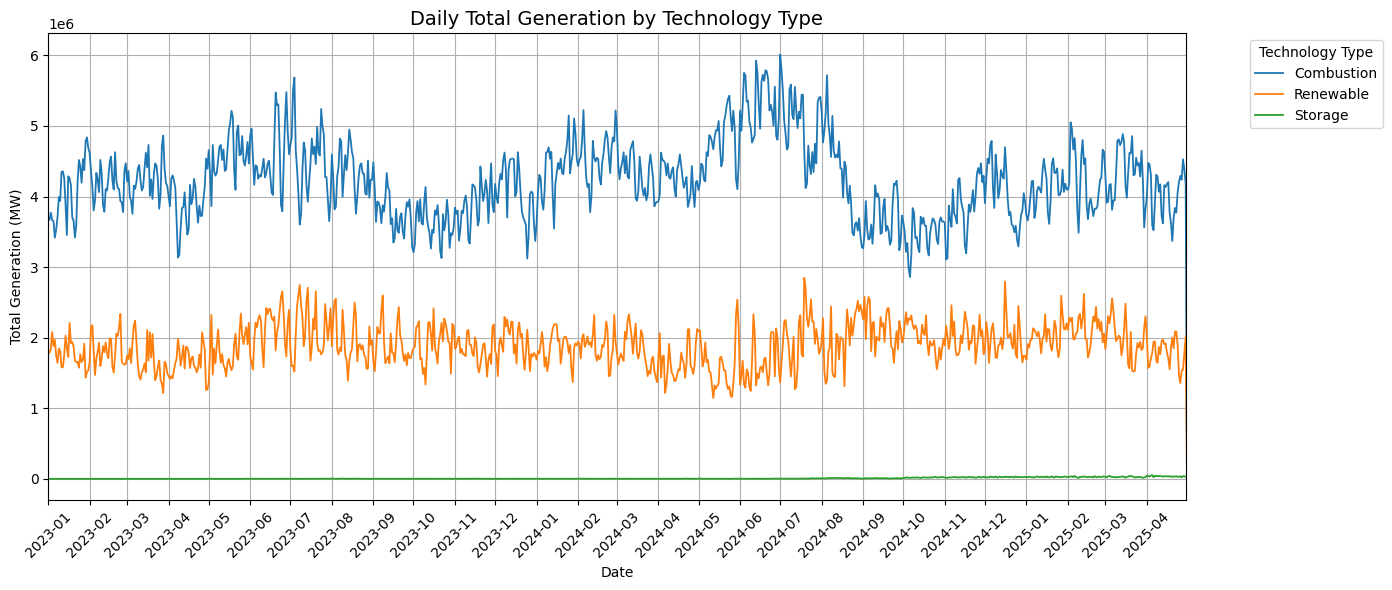

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime is parsed
scada_df_gen['SETTLEMENTDATE'] = pd.to_datetime(scada_df_gen['SETTLEMENTDATE'])
scada_df_gen['DATE'] = scada_df_gen['SETTLEMENTDATE'].dt.date

# Aggregate daily total generation by technology type
daily_generation = scada_df_gen.groupby(['DATE', 'Technology Type - Primary'])['SCADAVALUE'].sum().unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
daily_generation.plot(ax=ax, linewidth=1.3)

# Labels and formatting
ax.set_title("Daily Total Generation by Technology Type", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Total Generation (MW)")
ax.grid(True)
ax.legend(title="Technology Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Dynamic axis formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every 2 months for better spacing
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Auto-scale but cap at April 30, 2025
ax.set_xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))


plt.tight_layout()
plt.show()


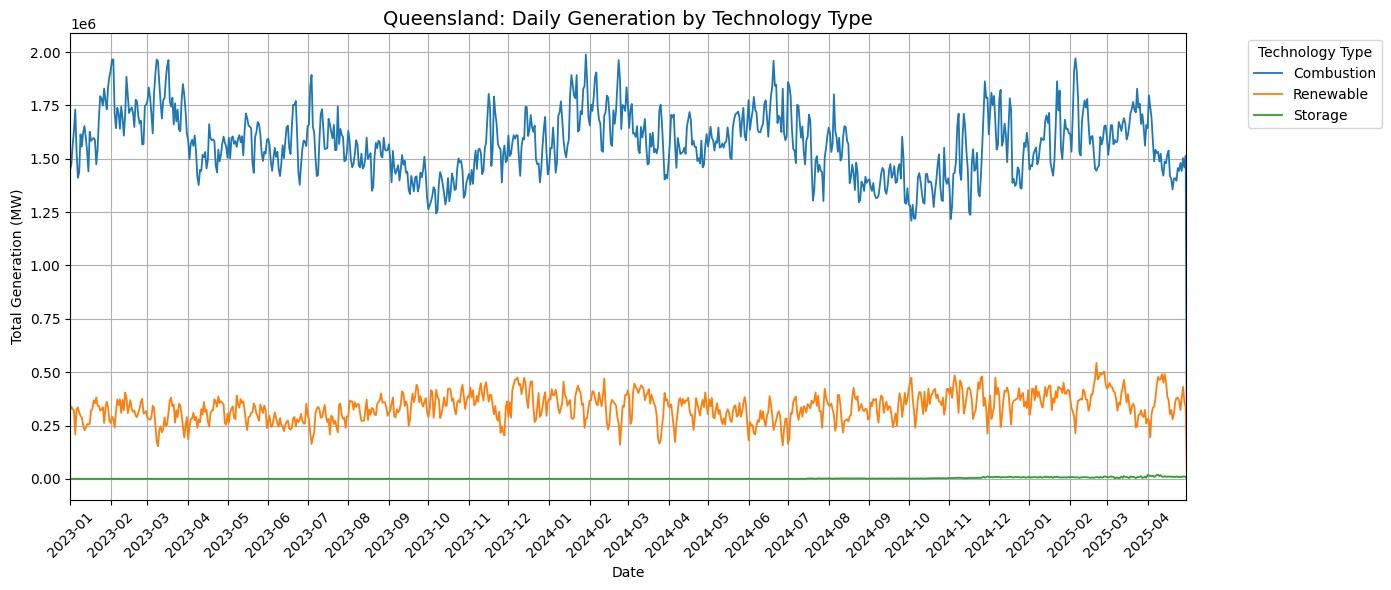

In [32]:
# Filter for Queensland (QLD1 only)
qld_df = scada_df_gen[scada_df_gen['Region'] == 'QLD1'].copy()

# Ensure date column exists
qld_df['DATE'] = pd.to_datetime(qld_df['SETTLEMENTDATE']).dt.date

# Group by DATE and Technology Type - Primary
qld_daily_gen = qld_df.groupby(['DATE', 'Technology Type - Primary'])['SCADAVALUE'].sum().unstack().fillna(0)

# Plotting
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14, 6))
qld_daily_gen.plot(ax=ax, linewidth=1.3)

ax.set_title("Queensland: Daily Generation by Technology Type", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Total Generation (MW)")
ax.grid(True)

# Legend outside
ax.legend(title="Technology Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format x-axis: monthly ticks with year-month formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
# Auto-scale but cap at April 30, 2025
ax.set_xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))


plt.tight_layout()
plt.show()


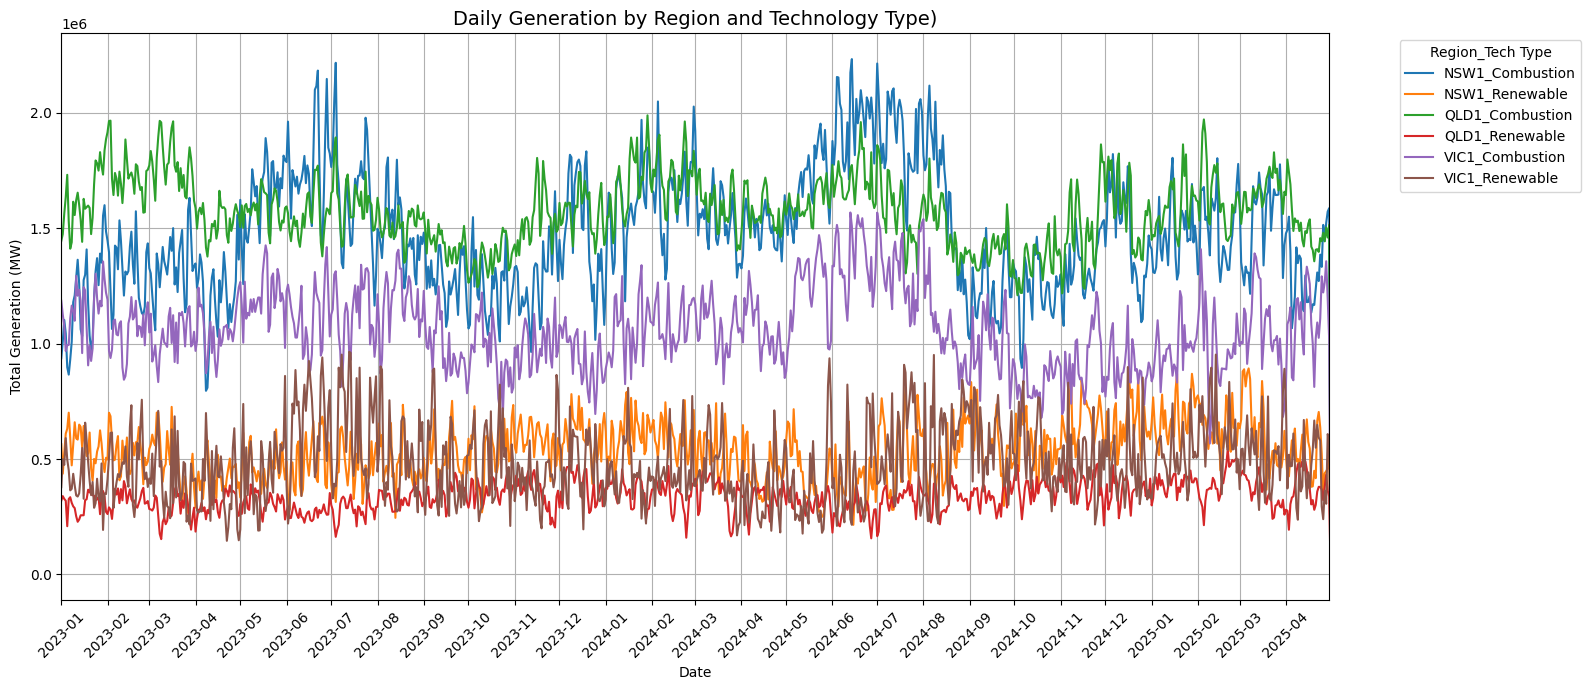

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime is parsed
scada_df_gen['SETTLEMENTDATE'] = pd.to_datetime(scada_df_gen['SETTLEMENTDATE'])
scada_df_gen['DATE'] = scada_df_gen['SETTLEMENTDATE'].dt.date

# Group data by DATE, Region, and Technology Type - Primary
region_daily_gen = (
    scada_df_gen
    .groupby(['DATE', 'Region', 'Technology Type - Primary'])['SCADAVALUE']
    .sum()
    .reset_index()
)

# Pivot to structure as Region x Tech Type for each day
pivoted = region_daily_gen.pivot_table(
    index='DATE',
    columns=['Region', 'Technology Type - Primary'],
    values='SCADAVALUE',
    aggfunc='sum'
).fillna(0)

# Flatten column names (e.g., 'QLD1_Renewable')
pivoted.columns = ['_'.join(col).strip() for col in pivoted.columns.values]

# Plot QLD, NSW, VIC — Renewable & Combustion only
plt.figure(figsize=(16, 7))
for col in pivoted.columns:
    if any(region in col for region in ['QLD1', 'NSW1', 'VIC1']) and any(tech in col for tech in ['Renewable', 'Combustion']):
        plt.plot(pivoted.index, pivoted[col], label=col)

plt.title("Daily Generation by Region and Technology Type)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Generation (MW)")
plt.xticks(rotation=45)
plt.grid(True)

# Format x-axis: monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Auto-scale but cap at April 30, 2025
plt.xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))

# Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Region_Tech Type")

plt.tight_layout()
plt.show()


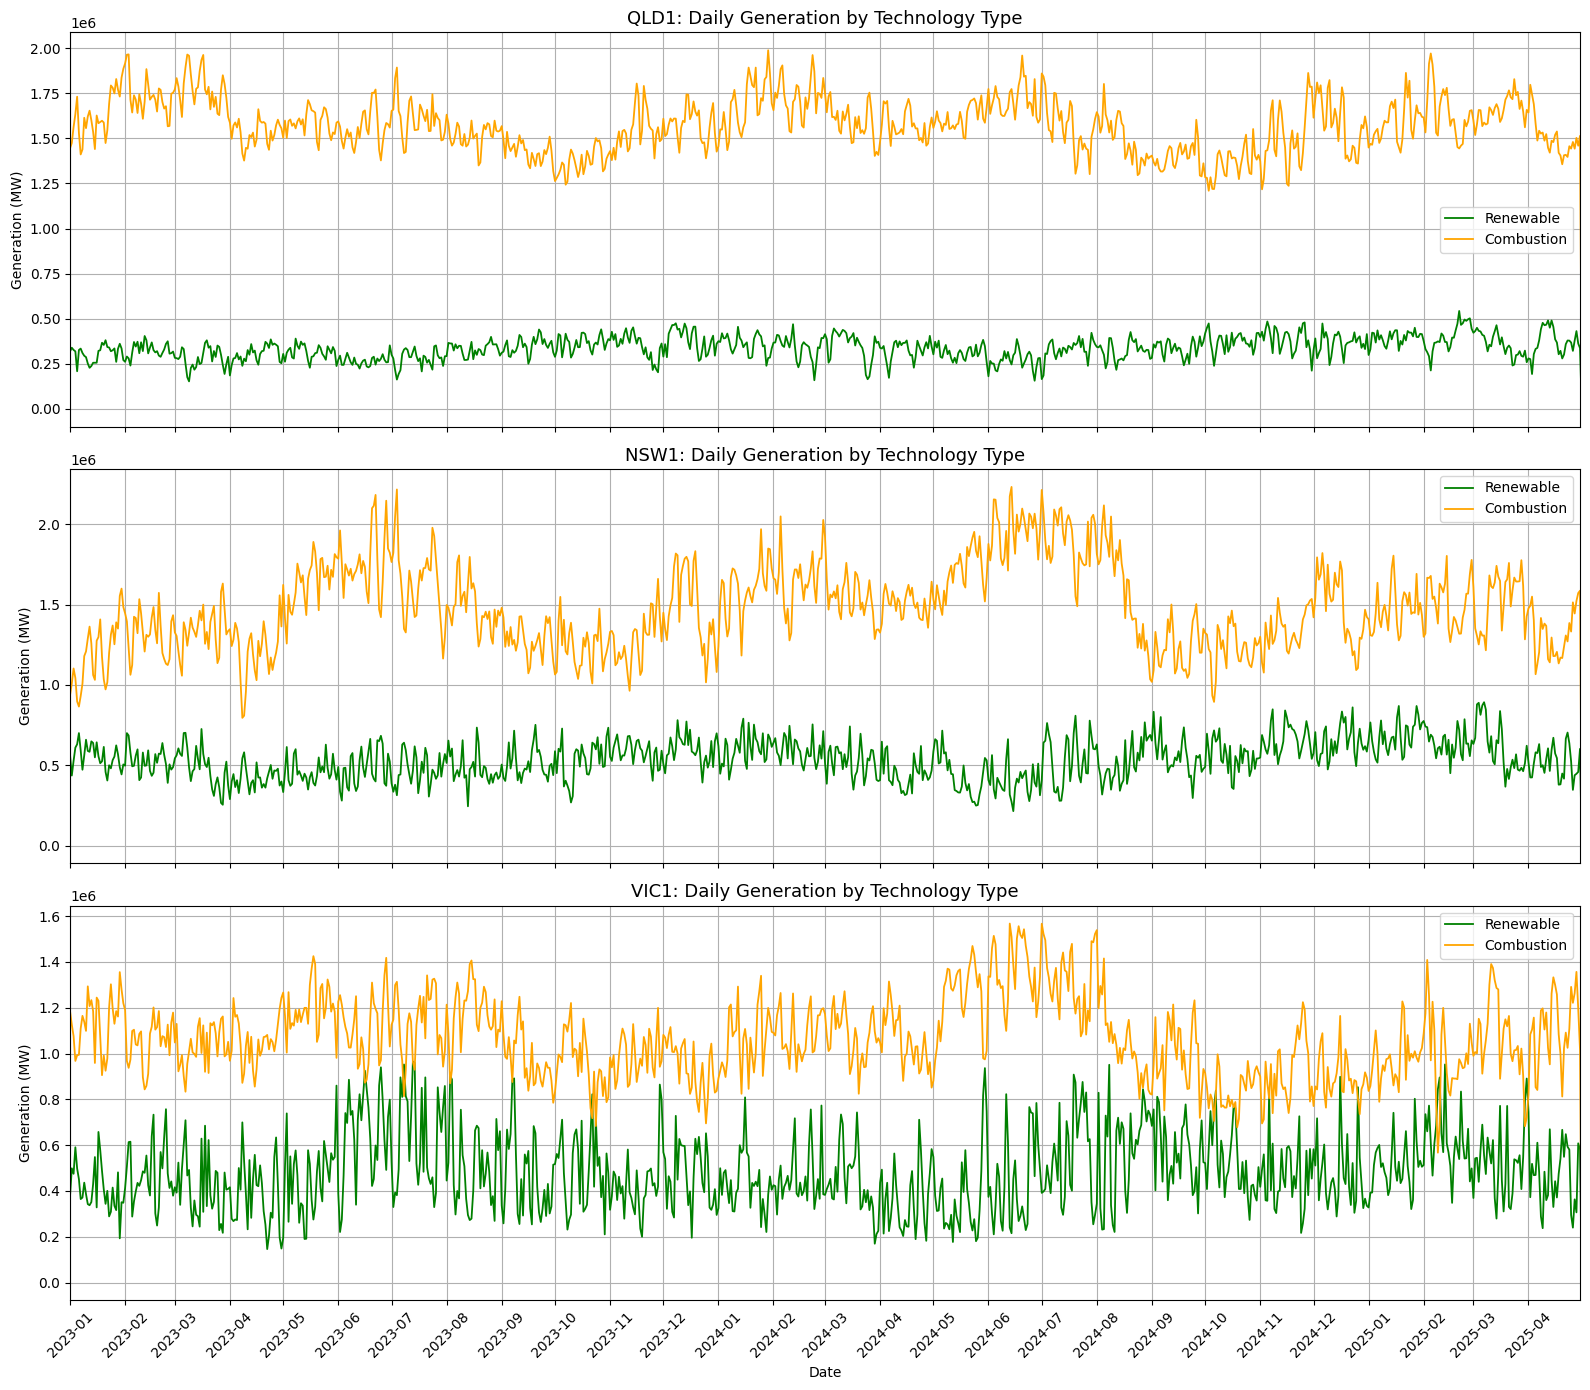

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create figure with 3 subplots (one per region)
fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

regions = ['QLD1', 'NSW1', 'VIC1']
colors = {'Renewable': 'green', 'Combustion': 'orange'}

for i, region in enumerate(regions):
    ax = axes[i]
    for tech in ['Renewable', 'Combustion']:
        col_name = f"{region}_{tech}"
        if col_name in pivoted.columns:
            ax.plot(pivoted.index, pivoted[col_name], label=tech, color=colors[tech], linewidth=1.3)

    ax.set_title(f"{region}: Daily Generation by Technology Type", fontsize=13)
    ax.set_ylabel("Generation (MW)")
    ax.grid(True)
    ax.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))

# Final formatting
axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


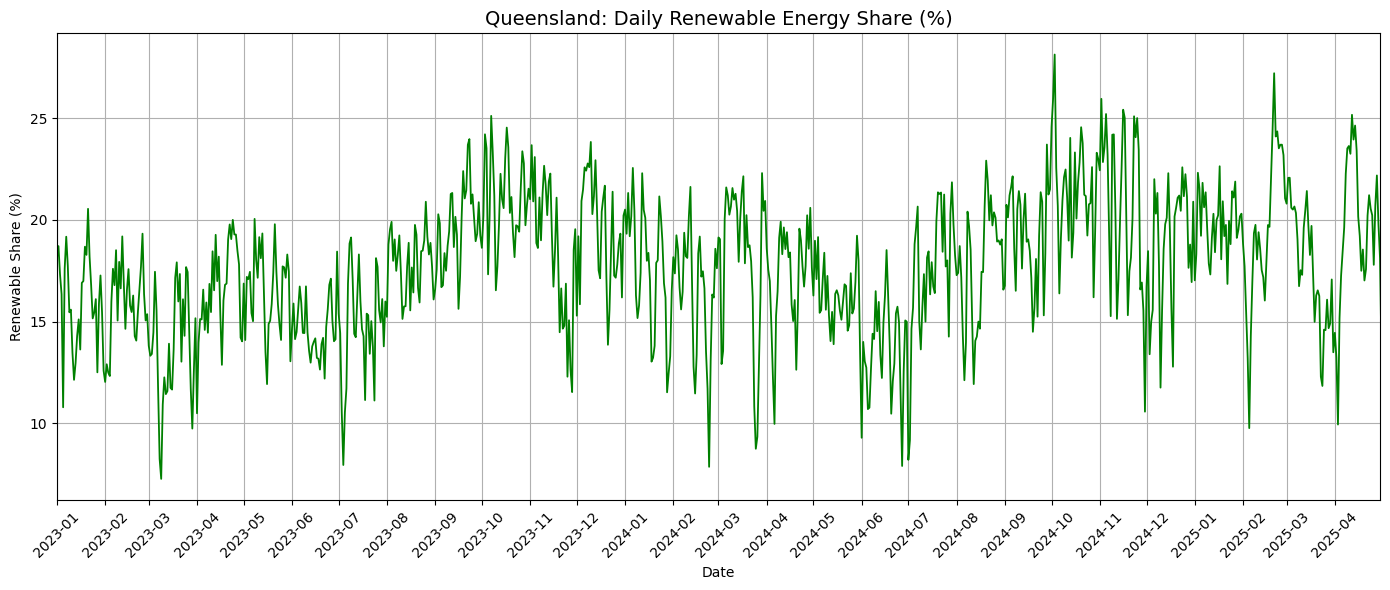

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for QLD1 region
qld_df = scada_df_gen[scada_df_gen['Region'] == 'QLD1'].copy()
qld_df['DATE'] = pd.to_datetime(qld_df['SETTLEMENTDATE']).dt.date

# Aggregate generation by day and technology type
qld_daily_totals = (
    qld_df.groupby(['DATE', 'Technology Type - Primary'])['SCADAVALUE']
    .sum()
    .unstack()
    .fillna(0)
)

# Calculate total generation and renewable % share
qld_daily_totals['Total'] = qld_daily_totals.sum(axis=1)
qld_daily_totals['Renewable %'] = (qld_daily_totals.get('Renewable', 0) / qld_daily_totals['Total']) * 100

# Plot renewable share
plt.figure(figsize=(14, 6))
plt.plot(qld_daily_totals.index, qld_daily_totals['Renewable %'], color='green', linewidth=1.3)
plt.title("Queensland: Daily Renewable Energy Share (%)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Renewable Share (%)")
plt.grid(True)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Auto-scale but cap at April 30, 2025
plt.xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))


plt.tight_layout()
plt.show()


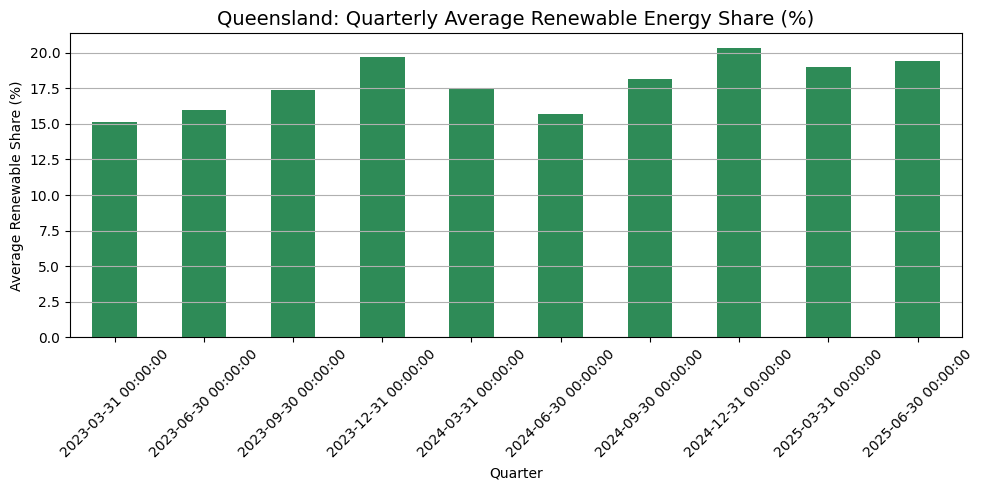

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Reuse or calculate QLD renewable share as before
qld_df = scada_df_gen[scada_df_gen['Region'] == 'QLD1'].copy()
qld_df['DATE'] = pd.to_datetime(qld_df['SETTLEMENTDATE']).dt.date

# Aggregate daily generation by tech type
qld_daily_totals = (
    qld_df.groupby(['DATE', 'Technology Type - Primary'])['SCADAVALUE']
    .sum()
    .unstack()
    .fillna(0)
)

# Compute daily total and renewable share
qld_daily_totals['Total'] = qld_daily_totals.sum(axis=1)
qld_daily_totals['Renewable %'] = (qld_daily_totals.get('Renewable', 0) / qld_daily_totals['Total']) * 100

# Convert index to datetime if it's not already
qld_daily_totals.index = pd.to_datetime(qld_daily_totals.index)

# Resample to quarterly average
qld_quarterly = qld_daily_totals['Renewable %'].resample('QE').mean()

# Plot
plt.figure(figsize=(10, 5))
qld_quarterly.plot(kind='bar', color='seagreen')
plt.title("Queensland: Quarterly Average Renewable Energy Share (%)", fontsize=14)
plt.ylabel("Average Renewable Share (%)")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


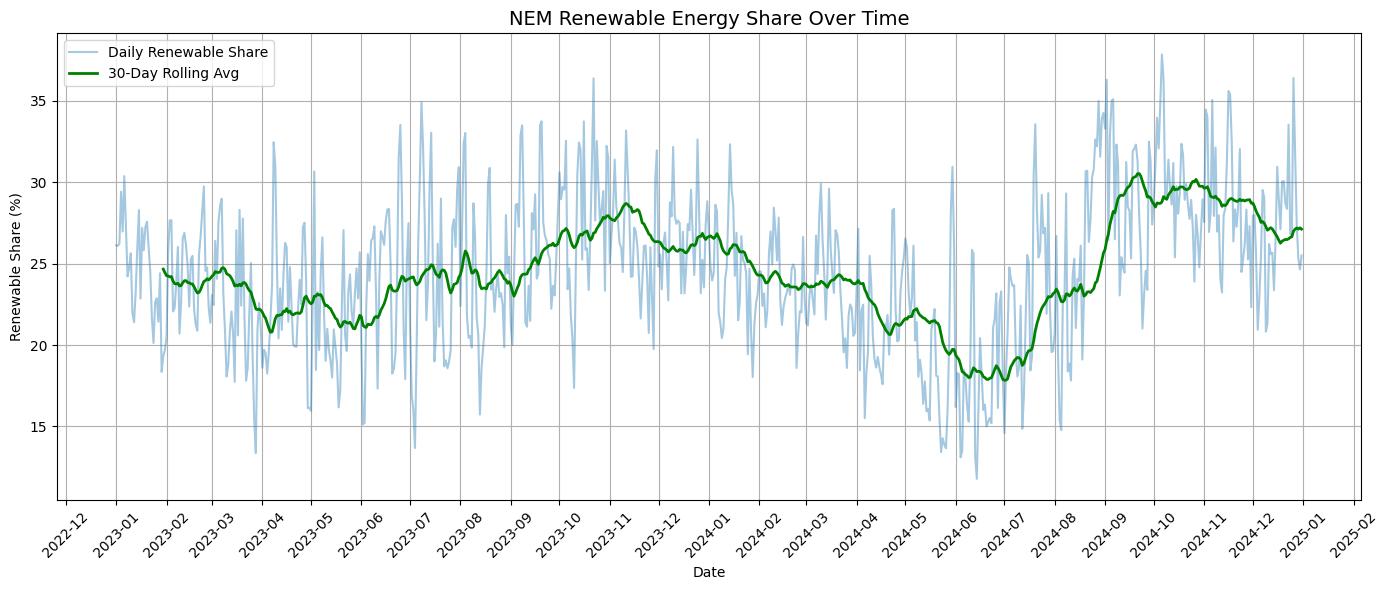

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime
pivot['DATE'] = pd.to_datetime(pivot['DATE'])

# Group nationally by DATE
national_daily = pivot.groupby('DATE')[['Renewable', 'Combustion', 'Total']].sum()
national_daily['Renewable Share (%)'] = (national_daily['Renewable'] / national_daily['Total']) * 100

# Rolling mean (30-day)
national_daily['Renewable Share (30D Avg)'] = national_daily['Renewable Share (%)'].rolling(window=30).mean()

# Restrict to Jan 2023 – Apr 2025
plot_df = national_daily.loc['2023-01-01':'2025-04-30']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(plot_df.index, plot_df['Renewable Share (%)'], label='Daily Renewable Share', alpha=0.4)
plt.plot(plot_df.index, plot_df['Renewable Share (30D Avg)'], label='30-Day Rolling Avg', color='green', linewidth=2)

plt.title("NEM Renewable Energy Share Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


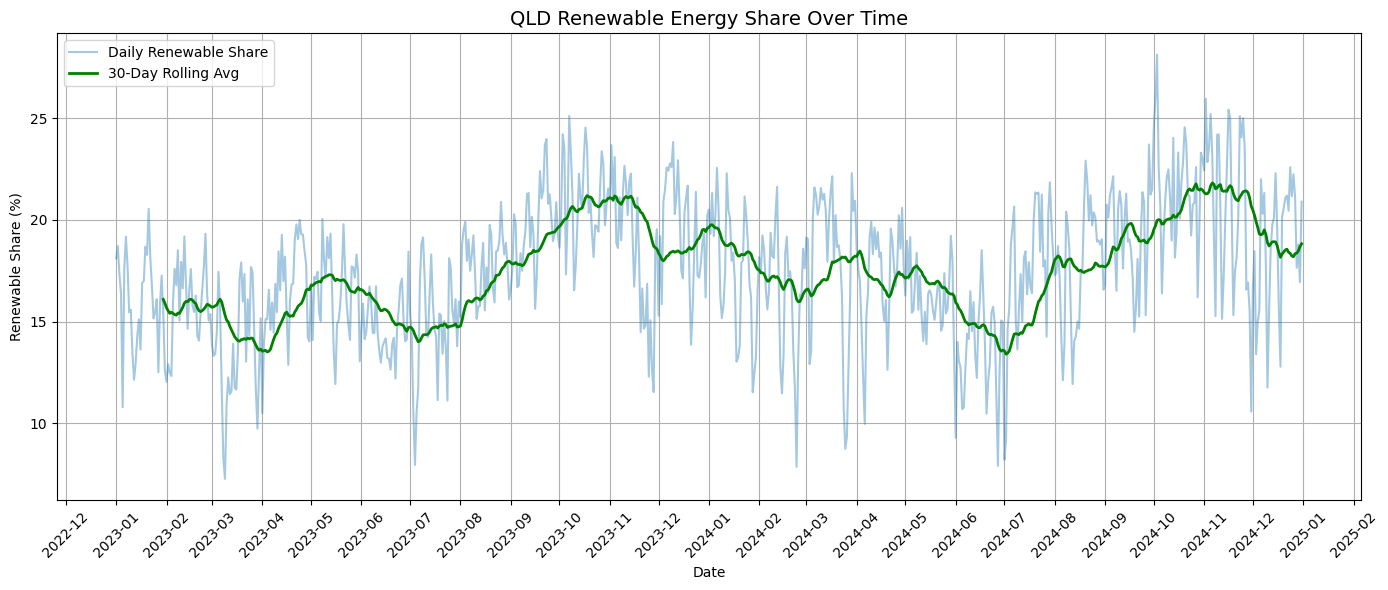

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime
pivot['DATE'] = pd.to_datetime(pivot['DATE'])

# Filter only QLD1 data
qld_only = pivot[pivot['Region'] == 'QLD1'].copy()

# Group by date and calculate total & renewable share
qld_daily = qld_only.groupby('DATE')[['Renewable', 'Combustion', 'Total']].sum()
qld_daily['Renewable Share (%)'] = (qld_daily['Renewable'] / qld_daily['Total']) * 100

# 30-day rolling average
qld_daily['Renewable Share (30D Avg)'] = qld_daily['Renewable Share (%)'].rolling(window=30).mean()

# Restrict to Jan 2023 – Apr 2025
qld_plot_df = qld_daily.loc['2023-01-01':'2025-04-30']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(qld_plot_df.index, qld_plot_df['Renewable Share (%)'], label='Daily Renewable Share', alpha=0.4)
plt.plot(qld_plot_df.index, qld_plot_df['Renewable Share (30D Avg)'], label='30-Day Rolling Avg', color='green', linewidth=2)

plt.title("QLD Renewable Energy Share Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

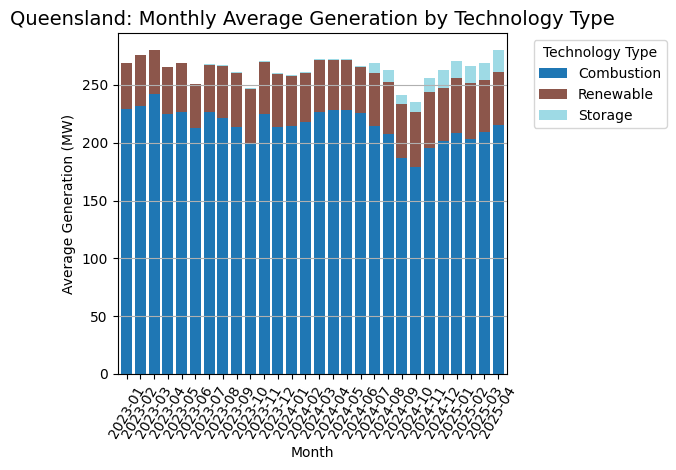

In [59]:
# Reuse QLD-only data
qld_df['MONTH'] = pd.to_datetime(qld_df['SETTLEMENTDATE']).dt.to_period('M')

# Group by month and technology type
monthly_avg_gen = (
    qld_df.groupby(['MONTH', 'Technology Type - Primary'])['SCADAVALUE']
    .mean()
    .unstack()
    .fillna(0)
)
monthly_avg_gen = monthly_avg_gen.loc['2023-01':'2025-04']
# Convert index to string for plotting
monthly_avg_gen.index = monthly_avg_gen.index.astype(str)

# Plot all months from 2023–2024
plt.figure(figsize=(14, 6))
monthly_avg_gen.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title("Queensland: Monthly Average Generation by Technology Type", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Generation (MW)")
plt.xticks(rotation=60)
plt.legend(title="Technology Type", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

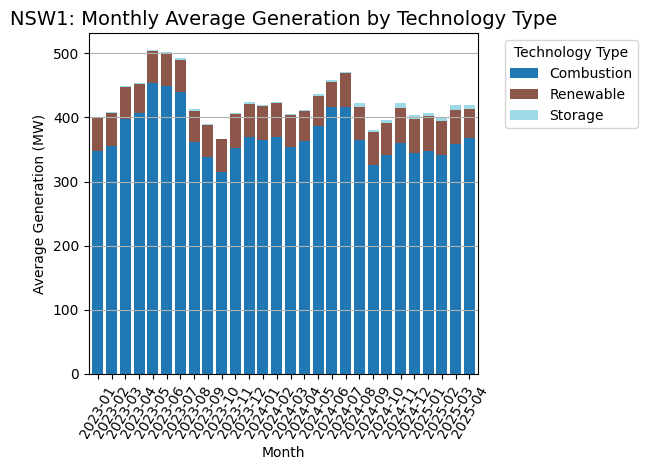

<Figure size 1400x600 with 0 Axes>

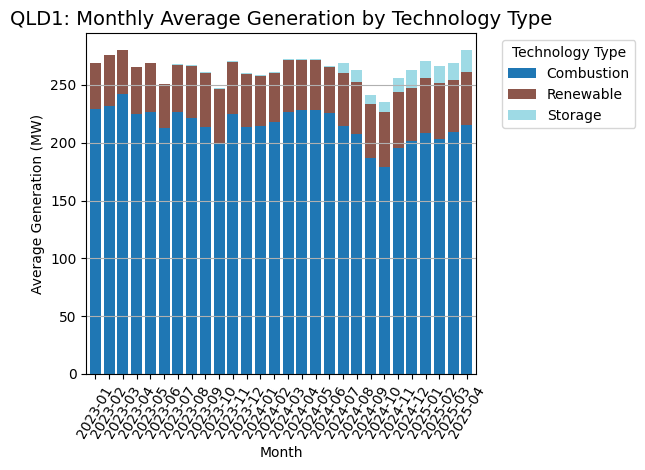

<Figure size 1400x600 with 0 Axes>

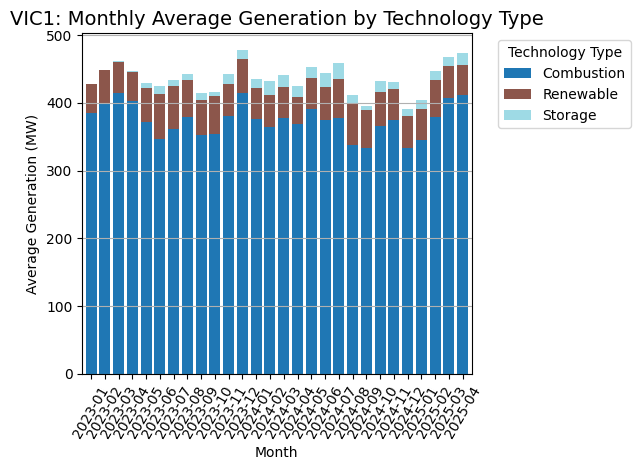

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and monthly period fields exist
scada_df_gen['SETTLEMENTDATE'] = pd.to_datetime(scada_df_gen['SETTLEMENTDATE'])
scada_df_gen['MONTH'] = scada_df_gen['SETTLEMENTDATE'].dt.to_period('M')

# Filter only major NEM regions
target_regions = ['QLD1', 'NSW1', 'VIC1']
filtered_df = scada_df_gen[scada_df_gen['Region'].isin(target_regions)].copy()

# Group by Region, MONTH, and Technology Type
monthly_region_avg = (
    filtered_df
    .groupby(['Region', 'MONTH', 'Technology Type - Primary'])['SCADAVALUE']
    .mean()
    .reset_index()
)

# Plotting loop for each region
for region in monthly_region_avg['Region'].unique():
    region_df = monthly_region_avg[monthly_region_avg['Region'] == region]

    # Filter months up to April 2025
    region_df = region_df[region_df['MONTH'] <= pd.Period('2025-04', freq='M')]

    # Pivot for plotting
    pivot_df = region_df.pivot_table(
        index='MONTH',
        columns='Technology Type - Primary',
        values='SCADAVALUE',
        aggfunc='mean'
    ).fillna(0)

    # Convert index to string for display
    pivot_df.index = pivot_df.index.astype(str)

    # Plot
    plt.figure(figsize=(14, 6))
    pivot_df.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
    plt.title(f"{region}: Monthly Average Generation by Technology Type", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Average Generation (MW)")
    plt.xticks(rotation=60)
    plt.legend(title="Technology Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


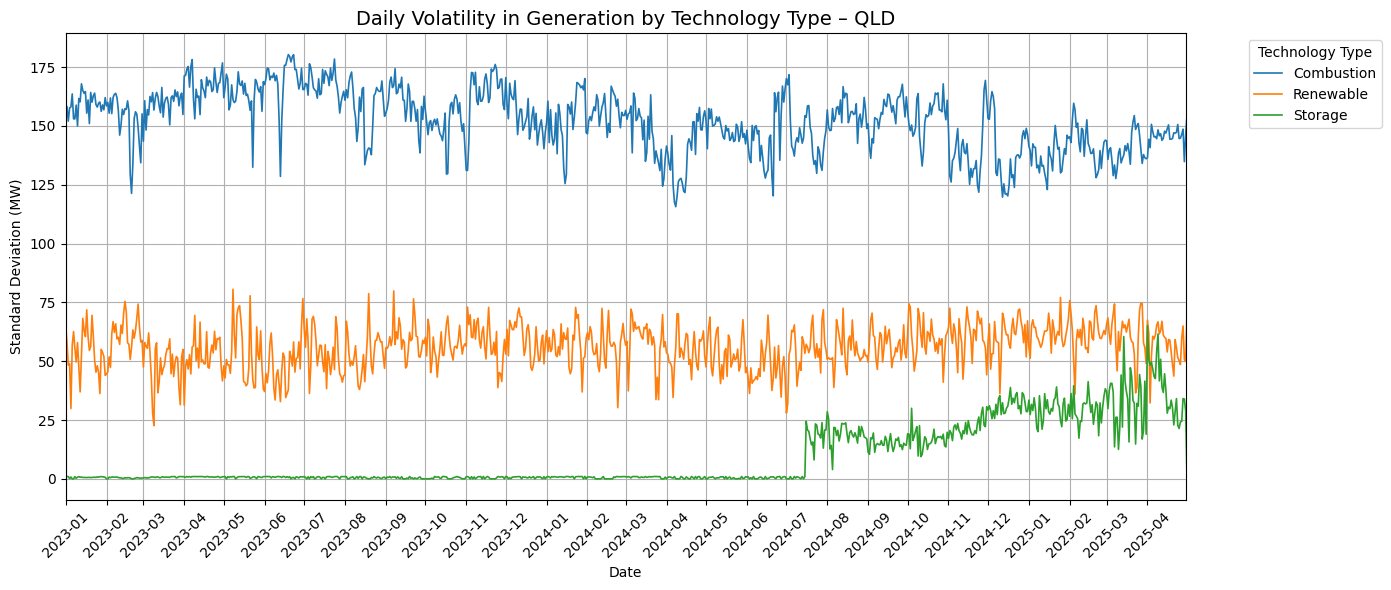

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for Queensland and set date
qld_df = scada_df_gen[scada_df_gen['Region'] == 'QLD1'].copy()
qld_df['DATE'] = pd.to_datetime(qld_df['SETTLEMENTDATE']).dt.date

# Group by DATE and Technology Type – calculate daily standard deviation (volatility)
volatility_by_day = (
    qld_df.groupby(['DATE', 'Technology Type - Primary'])['SCADAVALUE']
    .std()
    .unstack()
    .fillna(0)
)

# Plot
plt.figure(figsize=(14, 6))
volatility_by_day.plot(ax=plt.gca(), linewidth=1.2)
plt.title("Daily Volatility in Generation by Technology Type – QLD", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Standard Deviation (MW)")
plt.grid(True)
plt.legend(title="Technology Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format x-axis with monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Auto-scale but cap at April 30, 2025
plt.xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))


plt.tight_layout()
plt.show()


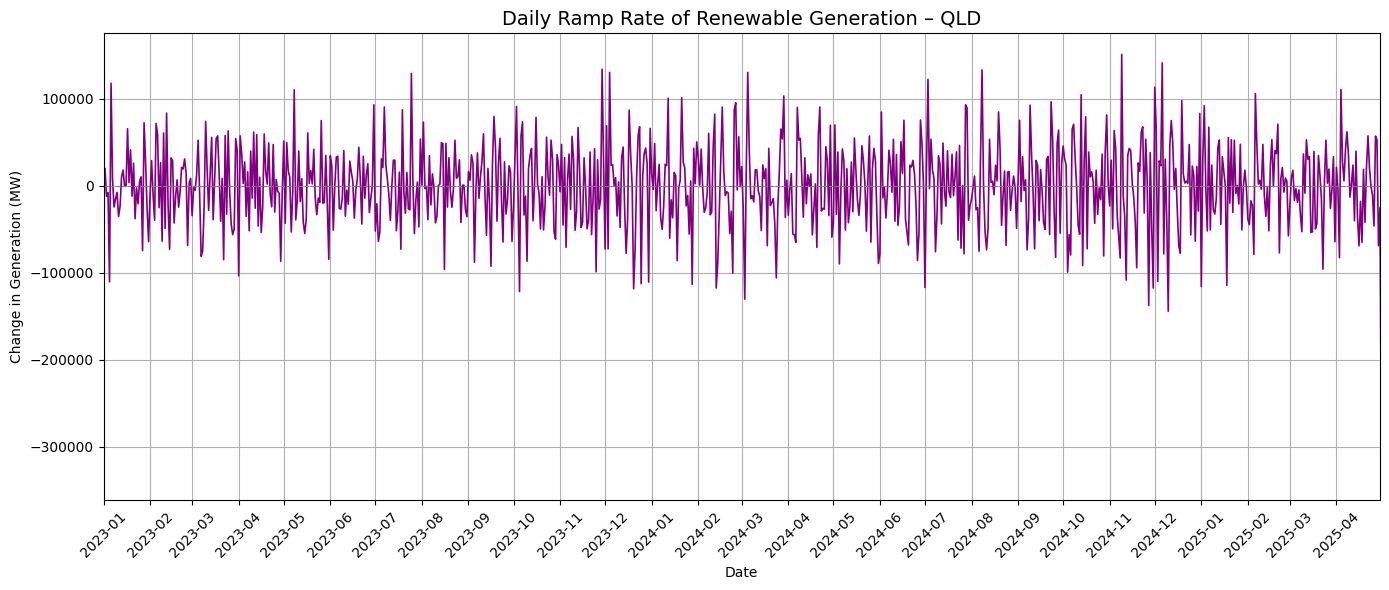

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for QLD and Renewable generation only
qld_renew_df = scada_df_gen[
    (scada_df_gen['Region'] == 'QLD1') &
    (scada_df_gen['Technology Type - Primary'] == 'Renewable')
].copy()

# Extract date and aggregate daily generation
qld_renew_df['DATE'] = pd.to_datetime(qld_renew_df['SETTLEMENTDATE']).dt.date
qld_daily_renewable = qld_renew_df.groupby('DATE')['SCADAVALUE'].sum().to_frame(name='Total_Renewable_Generation')

# Calculate daily ramp rate (ΔMW)
qld_daily_renewable['Ramp_Rate (MW)'] = qld_daily_renewable['Total_Renewable_Generation'].diff()

# Plot ramp rate
plt.figure(figsize=(14, 6))
plt.plot(qld_daily_renewable.index, qld_daily_renewable['Ramp_Rate (MW)'], color='purple', linewidth=1.2)
plt.title("Daily Ramp Rate of Renewable Generation – QLD", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Change in Generation (MW)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)

# Format x-axis for monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Auto-scale but cap at April 30, 2025
plt.xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))


plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Ensure date and region are defined
scada_df_gen['SETTLEMENTDATE'] = pd.to_datetime(scada_df_gen['SETTLEMENTDATE'])
scada_df_gen['DATE'] = scada_df_gen['SETTLEMENTDATE'].dt.date

# Filter for only major NEM regions and 2023–2024 period
scada_df_filtered = scada_df_gen[
    (scada_df_gen['Region'].isin(['QLD1', 'NSW1', 'VIC1'])) &
    (scada_df_gen['SETTLEMENTDATE'] < '2025-01-01')
].copy()

# Aggregate daily generation per region and technology type
daily_region_tech = (
    scada_df_filtered.groupby(['DATE', 'Region', 'Technology Type - Primary'])['SCADAVALUE']
    .sum()
    .reset_index()
)

# Pivot so each row = (DATE, Region), columns = tech types
pivot = daily_region_tech.pivot_table(
    index=['DATE', 'Region'],
    columns='Technology Type - Primary',
    values='SCADAVALUE',
    aggfunc='sum'
).fillna(0)

# Reset columns
pivot = pivot.reset_index()
pivot['Total'] = pivot[['Renewable', 'Combustion', 'Storage']].sum(axis=1)
pivot['Renewable Share (%)'] = (pivot['Renewable'] / pivot['Total']) * 100

# Now compute average renewable share per region
avg_renewable_share = pivot.groupby('Region')['Renewable Share (%)'].mean().round(2).reset_index()
avg_renewable_share.columns = ['Region', 'Avg Renewable Share (%)']
display(avg_renewable_share)


,Region,Avg Renewable Share (%)
0,NSW1,26.43
1,QLD1,17.49
2,VIC1,30.47


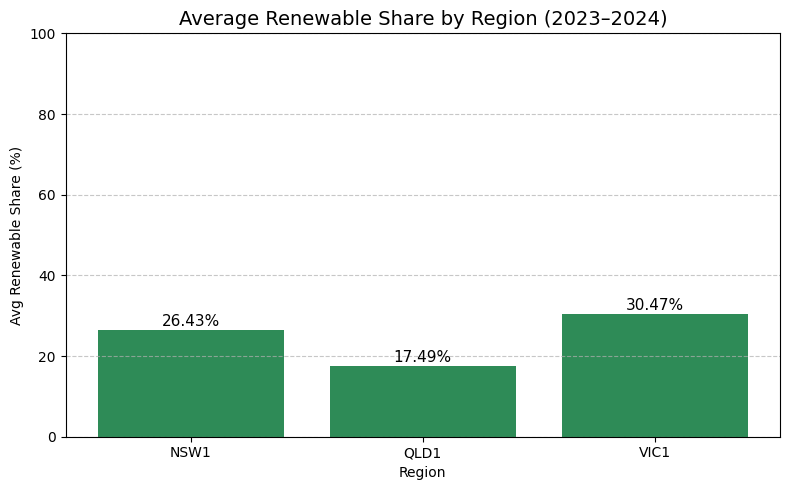

In [65]:
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(avg_renewable_share['Region'], avg_renewable_share['Avg Renewable Share (%)'], color='seagreen')

# Formatting
plt.title("Average Renewable Share by Region (2023–2024)", fontsize=14)
plt.ylabel("Avg Renewable Share (%)")
plt.xlabel("Region")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, row in avg_renewable_share.iterrows():
    plt.text(row['Region'], row['Avg Renewable Share (%)'] + 1,
             f"{row['Avg Renewable Share (%)']}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


In [41]:
# Filter for Queensland and Renewable only
qld_renew_df = scada_df_gen[
    (scada_df_gen['Region'] == 'QLD1') &
    (scada_df_gen['Technology Type - Primary'] == 'Renewable')
].copy()

# Convert to datetime and extract date
qld_renew_df['DATE'] = pd.to_datetime(qld_renew_df['SETTLEMENTDATE']).dt.date

# Aggregate by date
qld_daily_renewable = qld_renew_df.groupby('DATE')['SCADAVALUE'].sum()

# Convert to DataFrame and datetime index
qld_daily_renewable = qld_daily_renewable.to_frame(name='Renewable_Generation')
qld_daily_renewable.index = pd.to_datetime(qld_daily_renewable.index)

# Sort and check structure
qld_daily_renewable = qld_daily_renewable.sort_index()
qld_daily_renewable.head()

,Renewable_Generation
DATE,
2023-01-01,319622.306316
2023-01-02,339381.384433
2023-01-03,327303.996403
2023-01-04,319374.789857
2023-01-05,209058.380541


In [42]:
# Training data: all up to Dec 31, 2024
train = qld_daily_renewable.loc[:'2024-12-31']

# Test data: Jan 1, 2025 to Apr 30, 2025
test = qld_daily_renewable.loc['2025-01-01':'2025-04-30']

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (731, 1)
Test shape: (120, 1)


# ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


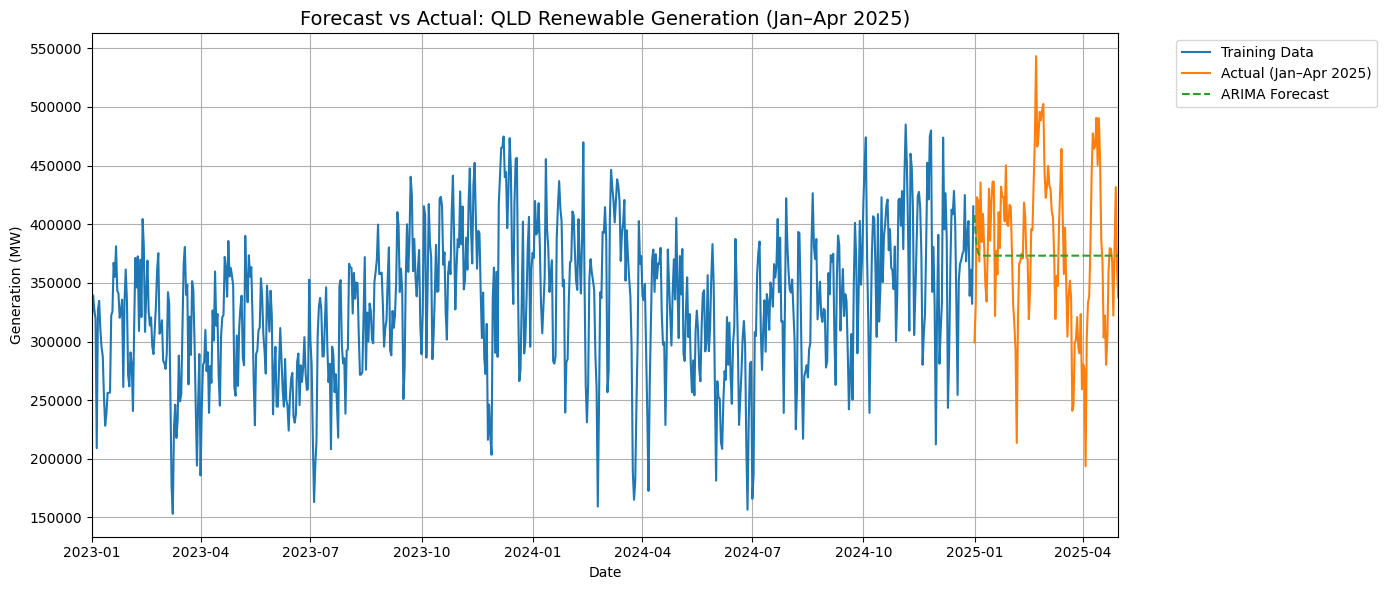

RMSE: 66046.77
MAE: 53161.78
MAPE: 14.86%


In [87]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # You can tune (p,d,q) later
fitted_model = model.fit()

# Forecast into Jan–Apr 2025
forecast = fitted_model.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual (Jan–Apr 2025)')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.title("Forecast vs Actual: QLD Renewable Generation (Jan–Apr 2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(daily_generation.index.min(), pd.to_datetime('2025-04-30'))
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test.values.flatten() - forecast.values) / test.values.flatten())) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


# XG BOOST

In [44]:
# Reset index for easy manipulation
df_ml = qld_daily_renewable.copy()
df_ml = df_ml.rename(columns={'Renewable_Generation': 'y'})
df_ml = df_ml.reset_index()

# Create lag features
for lag in range(1, 8):  # 1 to 7-day lags
    df_ml[f'lag_{lag}'] = df_ml['y'].shift(lag)

# Drop rows with NaN due to lagging
df_ml = df_ml.dropna()

# Set index back to datetime
df_ml.set_index('DATE', inplace=True)

df_ml.head()

,y,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
DATE,,,,,,,,
2023-01-08,310338.845149,334722.056781,326920.843275,209058.380541,319374.789857,327303.996403,339381.384433,319622.306316
2023-01-09,295018.132814,310338.845149,334722.056781,326920.843275,209058.380541,319374.789857,327303.996403,339381.384433
2023-01-10,287368.373748,295018.132814,310338.845149,334722.056781,326920.843275,209058.380541,319374.789857,327303.996403
2023-01-11,252126.527545,287368.373748,295018.132814,310338.845149,334722.056781,326920.843275,209058.380541,319374.789857
2023-01-12,228219.629478,252126.527545,287368.373748,295018.132814,310338.845149,334722.056781,326920.843275,209058.380541


In [45]:
from datetime import datetime

# Split data
train_ml = df_ml.loc[:'2024-12-31']
test_ml = df_ml.loc['2025-01-01':'2025-04-30']

# Separate features and target
X_train = train_ml.drop(columns='y')
y_train = train_ml['y']

X_test = test_ml.drop(columns='y')
y_test = test_ml['y']

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (724, 7)
X_test shape: (120, 7)


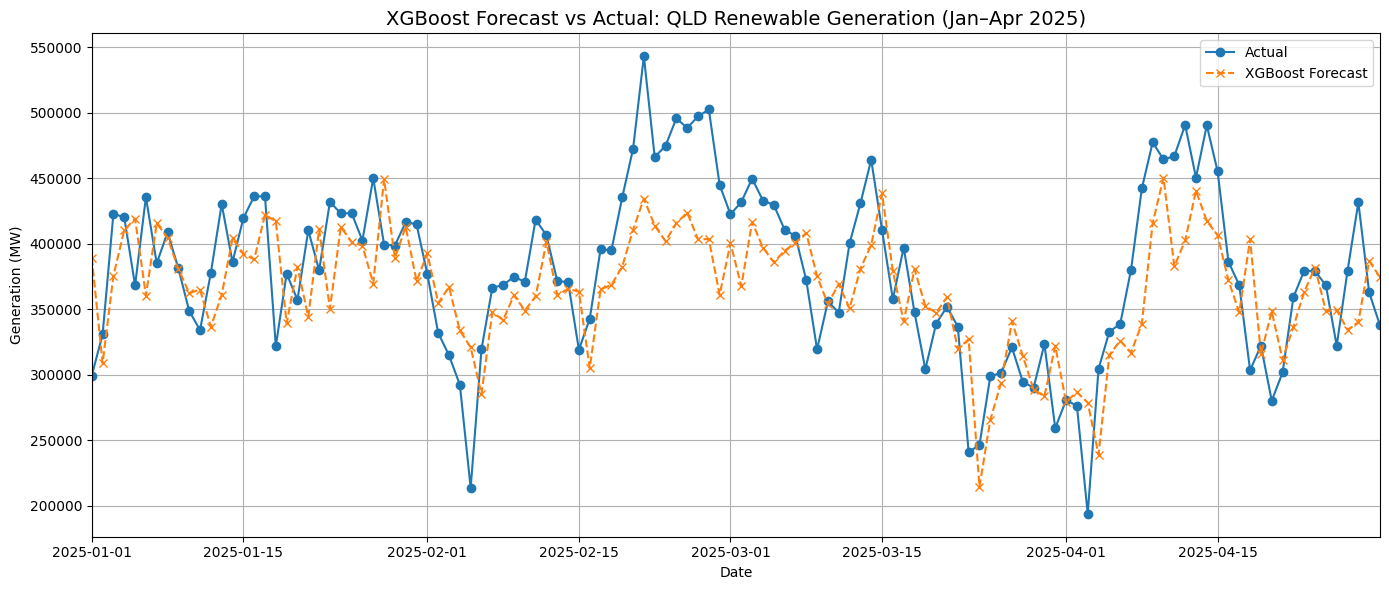

XGBoost RMSE: 48985.10
XGBoost MAE: 39722.56
XGBoost MAPE: 10.71%


In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, xgb_preds, label='XGBoost Forecast', linestyle='--', marker='x')
plt.title("XGBoost Forecast vs Actual: QLD Renewable Generation (Jan–Apr 2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.xlim(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-04-30'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
mae = mean_absolute_error(y_test, xgb_preds)
mape = np.mean(np.abs((y_test.values - xgb_preds) / y_test.values)) * 100

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost MAPE: {mape:.2f}%")


# LSTM

In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data_lstm = qld_daily_renewable[['Renewable_Generation']].copy()

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_lstm)

# 3. Create lagged sequences (e.g., 7 days history → next day prediction)
def create_sequences(data, window=7):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 7
X_lstm, y_lstm = create_sequences(data_scaled, window=window_size)

print(f"X shape: {X_lstm.shape}, y shape: {y_lstm.shape}")

X shape: (845, 7, 1), y shape: (845, 1)


In [48]:
# Step 1: Aligned date index (starting from day 7)
sequence_dates = qld_daily_renewable.index[window_size:]

# Step 2: Find split points
train_end_date = pd.to_datetime('2024-12-31')
test_start_date = pd.to_datetime('2025-01-01')
test_end_date = pd.to_datetime('2025-04-30')

train_mask = sequence_dates <= train_end_date
test_mask = (sequence_dates >= test_start_date) & (sequence_dates <= test_end_date)

# Step 3: Split data
X_train_lstm, y_train_lstm = X_lstm[train_mask], y_lstm[train_mask]
X_test_lstm, y_test_lstm = X_lstm[test_mask], y_lstm[test_mask]

print(f"Train shape: {X_train_lstm.shape}, {y_train_lstm.shape}")
print(f"Test shape: {X_test_lstm.shape}, {y_test_lstm.shape}")

Train shape: (724, 7, 1), (724, 1)
Test shape: (120, 7, 1), (120, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2098 - val_loss: 0.0132
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0107
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0120
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0109
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0132
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0107
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - val_loss: 0.0105
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0108
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0115
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

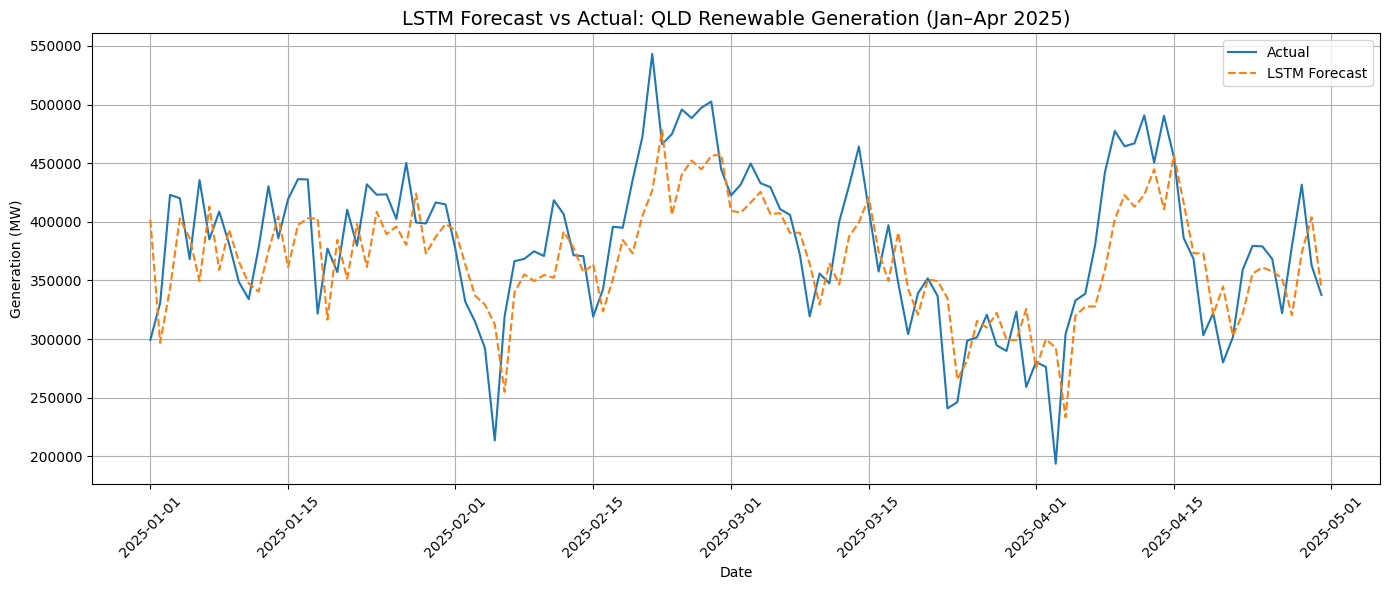

LSTM RMSE: 44651.16
LSTM MAE: 36148.77
LSTM MAPE: 9.90%


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# Predict (scaled)
lstm_preds_scaled = model.predict(X_test_lstm)

# Inverse transform predictions and actual values
lstm_preds = scaler.inverse_transform(lstm_preds_scaled)
y_test_inverse = scaler.inverse_transform(y_test_lstm)

# Plot with date-based x-axis
plt.figure(figsize=(14, 6))
plt.plot(sequence_dates[test_mask], y_test_inverse, label='Actual')
plt.plot(sequence_dates[test_mask], lstm_preds, label='LSTM Forecast', linestyle='--')
plt.title("LSTM Forecast vs Actual: QLD Renewable Generation (Jan–Apr 2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inverse, lstm_preds))
mae = mean_absolute_error(y_test_inverse, lstm_preds)
mape = np.mean(np.abs((y_test_inverse - lstm_preds) / y_test_inverse)) * 100

print(f"LSTM RMSE: {rmse:.2f}")
print(f"LSTM MAE: {mae:.2f}")
print(f"LSTM MAPE: {mape:.2f}%")


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Helper function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'MAPE (%)': round(mape, 2),
        'R² Score': round(r2, 4)
    }

# Build comparison
results = []

results.append(evaluate_model(y_test.values, forecast, 'ARIMA'))
results.append(evaluate_model(y_test.values, xgb_preds, 'XGBoost'))
results.append(evaluate_model(y_test_inverse, lstm_preds, 'LSTM'))

# Converted to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE,MAE,MAPE (%),R² Score
0,ARIMA,66046.77,53161.78,14.86,-0.0254
1,XGBoost,48985.10,39722.56,10.71,0.4360
2,LSTM,44651.16,36148.77,9.90,0.5314
